In [3]:
%cd ~/Desktop/titanic


/Users/xumengze/Desktop/titanic


In [4]:
from pathlib import Path  
print("CWD:", Path.cwd())


DATA = Path("data")
DATA.mkdir(parents=True, exist_ok=True)


print("Files in ./data:")
for p in sorted(DATA.glob("*")):
    print(" -", p.name)


CWD: /Users/xumengze/Desktop/titanic
Files in ./data:
 - .DS_Store
 - gender_submission.csv
 - test.csv
 - train.csv


In [9]:
import pandas as pd  

titanic = pd.read_csv("data/train.csv")  

print("Shape:", titanic.shape)  


Shape: (891, 12)
missing values:


In [12]:
na_mask = titanic.isna()

missing_counts = na_mask.sum()

print("Missing values per column：")
print(missing_counts)


missing_pct = (missing_counts / len(titanic)).round(3)
print("Missing percentage：")
print(missing_pct)



Missing values per column：
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Missing percentage：
PassengerId    0.000
Survived       0.000
Pclass         0.000
Name           0.000
Sex            0.000
Age            0.199
SibSp          0.000
Parch          0.000
Ticket         0.000
Fare           0.000
Cabin          0.771
Embarked       0.002
dtype: float64


In [13]:
import numpy as np  #numerical utils

#Fill missing Age with the median
titanic["Age"] = titanic["Age"].fillna(titanic["Age"].median())

titanic["Embarked"] = titanic["Embarked"].fillna(titanic["Embarked"].mode()[0])

# missing Cabin- "Unknown"
titanic["Cabin"] = titanic["Cabin"].fillna("Unknown")


In [19]:
# Family size incl. self
titanic["FamilySize"] = titanic["SibSp"] + titanic["Parch"] + 1

# Age groups
titanic["AgeGroup"] = pd.cut(
    titanic["Age"],
    bins=[-np.inf, 12, 18, 60, np.inf],          
    labels=["child", "teen", "adult", "senior"]  
)


for col in ["Sex", "Embarked", "Pclass", "AgeGroup"]:
    if col in titanic.columns:
        titanic[col] = titanic[col].astype("category")


titanic[["Survived","Sex","Pclass","Age","AgeGroup","FamilySize","Fare"]].head(5)

,Survived,Sex,Pclass,Age,AgeGroup,FamilySize,Fare
0,0,male,3,22.0,adult,2,7.2500
1,1,female,1,38.0,adult,2,71.2833
2,1,female,3,26.0,adult,1,7.9250
3,1,female,1,35.0,adult,2,53.1000
4,0,male,3,35.0,adult,1,8.0500


In [20]:

num_summary = titanic[["Age", "Fare"]].agg(["mean", "median", "std"])
print("Age & Fare summary:\n", num_summary, "\n")  

surv_by_sex = titanic.groupby("Sex")["Survived"].mean()
print("Survival rate by sex:\n", surv_by_sex, "\n")


surv_by_pclass = titanic.groupby("Pclass")["Survived"].mean()
print("Survival rate by class:\n", surv_by_pclass, "\n")


surv_by_agegroup = titanic.groupby("AgeGroup")["Survived"].mean()
print("Survival rate by age group:\n", surv_by_agegroup, "\n")


Age & Fare summary:
               Age       Fare
mean    29.361582  32.204208
median  28.000000  14.454200
std     13.019697  49.693429 

Survival rate by sex:
 Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64 

Survival rate by class:
 Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64 

Survival rate by age group:
 AgeGroup
child     0.579710
teen      0.428571
adult     0.365753
senior    0.227273
Name: Survived, dtype: float64 



/var/folders/vv/v5t3xk3x3l7dbt3ctwgy7j100000gn/T/ipykernel_86991/2439279329.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  surv_by_sex = titanic.groupby("Sex")["Survived"].mean()
/var/folders/vv/v5t3xk3x3l7dbt3ctwgy7j100000gn/T/ipykernel_86991/2439279329.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  surv_by_pclass = titanic.groupby("Pclass")["Survived"].mean()
/var/folders/vv/v5t3xk3x3l7dbt3ctwgy7j100000gn/T/ipykernel_86991/2439279329.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current beh

I cleaned the Titanic data, filled missing Age with the median.
By Sex: Female survival ≈ 74.2% > male ≈ 18.9%
By Class: Class 1: 63.0% > Class 2: 47.3% > Class 3: 24.2%
By Age Group: Children: 57.9% > Teens: 42.9% > Adults: 36.6% > Seniors: 22.7%.

So，women and children and higher classes had higher survival.

In [24]:

llm_table = (
    titanic.groupby(["Sex", "Pclass"])
           .agg(Avg_Age=("Age", "mean"),
                Avg_Fare=("Fare", "mean"),
                Survival_Rate=("Survived", "mean"))
           .reset_index()
)

print(llm_table)

      Sex Pclass    Avg_Age    Avg_Fare  Survival_Rate
0  female      1  33.978723  106.125798       0.968085
1  female      2  28.703947   21.970121       0.921053
2  female      3  23.572917   16.118810       0.500000
3    male      1  38.995246   67.226127       0.368852
4    male      2  30.512315   19.741782       0.157407
5    male      3  26.911873   12.661633       0.135447


/var/folders/vv/v5t3xk3x3l7dbt3ctwgy7j100000gn/T/ipykernel_86991/1964671365.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby(["Sex", "Pclass"])


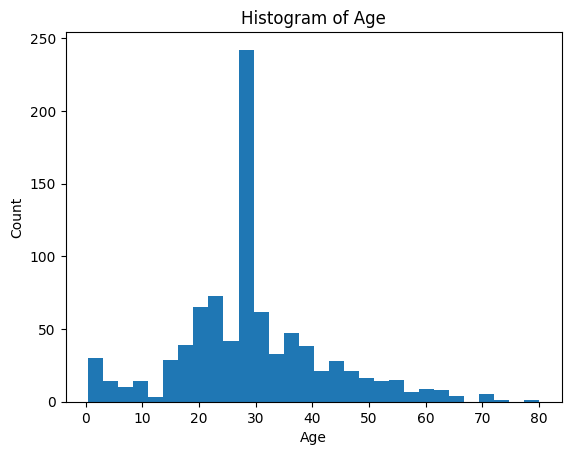

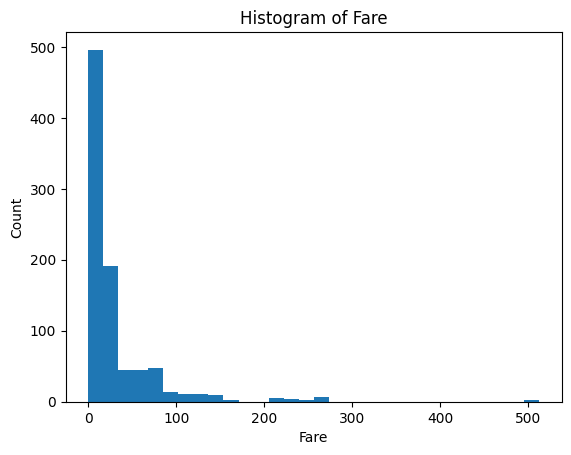

/var/folders/vv/v5t3xk3x3l7dbt3ctwgy7j100000gn/T/ipykernel_86991/1359013584.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby("Sex")["Survived"].mean().plot(kind="bar")


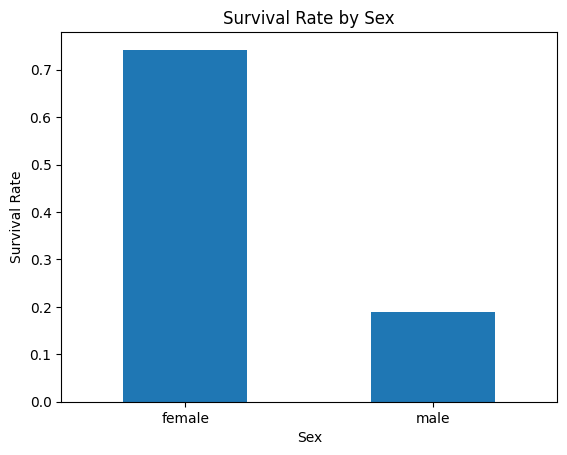

/var/folders/vv/v5t3xk3x3l7dbt3ctwgy7j100000gn/T/ipykernel_86991/1359013584.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby("Pclass")["Survived"].mean().plot(kind="bar")


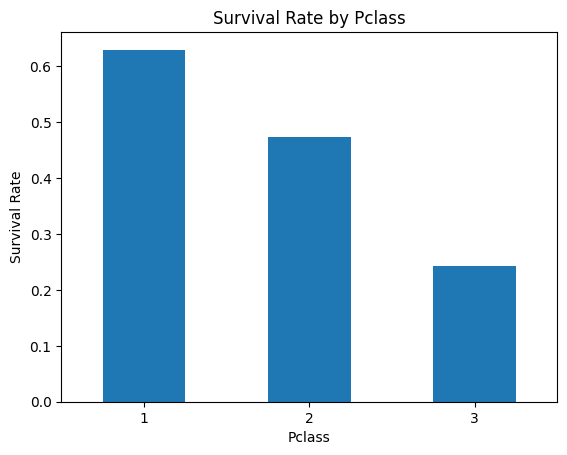

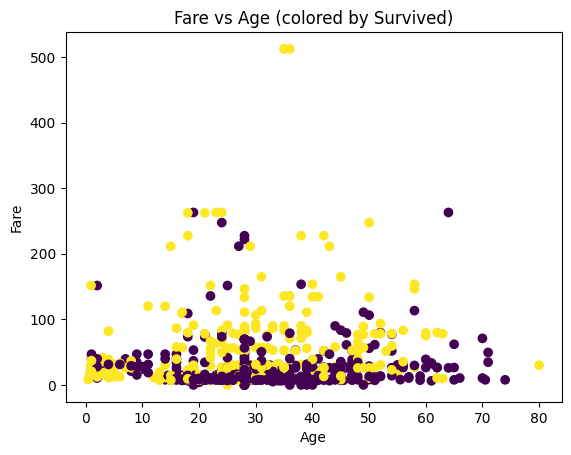

In [25]:
import matplotlib.pyplot as plt 


plt.figure()
plt.hist(titanic["Age"], bins=30)  
plt.xlabel("Age")               
plt.ylabel("Count")
plt.title("Histogram of Age")
plt.show()


plt.figure()
plt.hist(titanic["Fare"], bins=30)
plt.xlabel("Fare")
plt.ylabel("Count")
plt.title("Histogram of Fare")
plt.show()

# Bar chart
plt.figure()
titanic.groupby("Sex")["Survived"].mean().plot(kind="bar")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Sex")
plt.xticks(rotation=0)
plt.show()


plt.figure()
titanic.groupby("Pclass")["Survived"].mean().plot(kind="bar")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Pclass")
plt.xticks(rotation=0)
plt.show()


plt.figure()
plt.scatter(titanic["Age"], titanic["Fare"], c=titanic["Survived"])  # c=0/1 自动两色 / auto two colors
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Fare vs Age (colored by Survived)")
plt.show()


Overall, survival on the Titanic was strongly linked to gender, age, and passenger class